In [2]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest

Bike sharing data set collected from UCI [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) 

In [3]:
#Import dataset
df = pd.read_csv('Bike-Sharing.csv')
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Here is a list with a short description of the columns :

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## 1) The country you live in has been steadily implementing policies to reduce green house gas emissions. 

## You want to check if the policies have had an effect. To do this, you chose to analyze the data that you've collected on biking habits over the last two weeks. You want to see if there is a statistically significant difference in registered bikers from the previous year which had a national average of 3200 registered bikers.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

[]

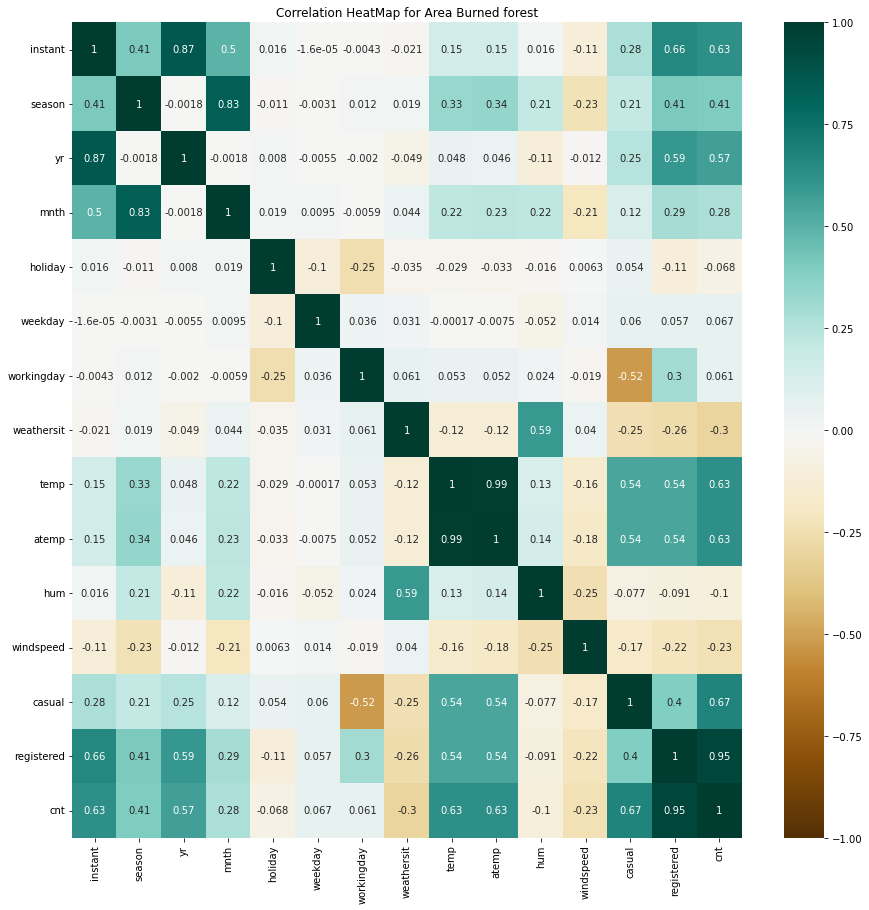

In [5]:
# First look for different correlations to get an assumption.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title("Correlation HeatMap for Area Burned forest")
plt.plot()
# There is a correlation between registerd bikers and the year

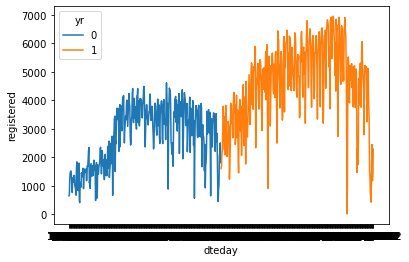

In [6]:
# Look at a Timeseries version to help see the trends from the two years. 
sns.lineplot(x="dteday",y="registered", hue="yr",data=df)
plt.show()

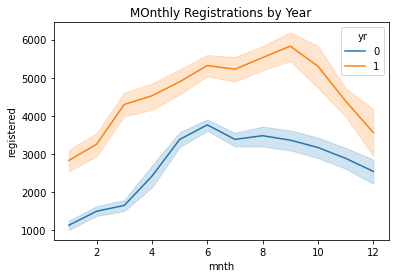

In [7]:
sns.lineplot(x="mnth", y="registered", hue="yr", data=df).set_title("MOnthly Registrations by Year")
plt.show()

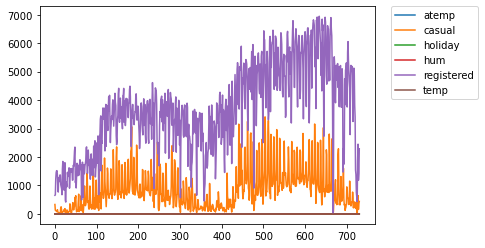

In [8]:
# There are some seasonal tends that are being exhibited. 
df[df.columns.difference(["yr","weekday","workingday","cnt","windspeed","weathersit","mnth","season","instant"])].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)

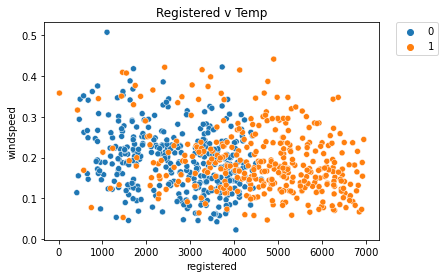

In [9]:
# Now throw up a scatter plot to analyize
sns.scatterplot(data=df, x="registered", y="windspeed", hue="yr")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.title("Registered v Temp")
plt.show()

[]

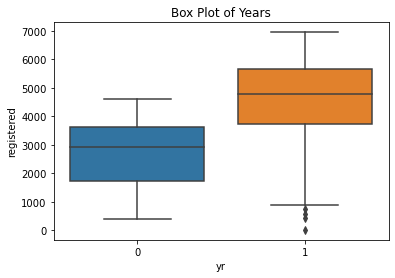

In [10]:
sns.boxplot(data=df, x="yr", y="registered").set_title("Box Plot of Years")
plt.plot()

In [11]:
# Now for the hypothis testing.
# IS year 1 different from year 0?
df_yr1 = df[df['yr'] == 0].copy()
df_yr2 = df[df['yr'] == 1].copy()
df_yr1.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,0.0,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,677.402740,2728.358904,3405.761644
std,105.510663,1.110946,0.0,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,556.269121,1060.110413,1378.753666
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,92.000000,2.000000,0.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,222.000000,1730.000000,2132.000000
50%,183.000000,3.000000,0.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,614.000000,2915.000000,3740.000000
75%,274.000000,3.000000,0.0,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,871.000000,3632.000000,4586.000000
max,365.000000,4.000000,0.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,3065.000000,4614.000000,6043.000000


In [12]:
df_yr2.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,548.500000,2.494536,1.0,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572,1018.483607,4581.450820,5599.934426
std,105.799338,1.112185,0.0,3.455958,0.170971,2.006108,0.465921,0.516057,0.176112,0.156756,0.134206,0.078194,758.989897,1424.331846,1788.667868
min,366.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.254167,0.046650,2.000000,20.000000,22.000000
25%,457.250000,2.000000,1.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.347708,0.350685,0.508125,0.133721,429.750000,3730.500000,4369.000000
50%,548.500000,2.500000,1.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.497779,0.611875,0.174750,904.500000,4776.500000,5927.000000
75%,639.750000,3.000000,1.0,9.750000,0.000000,5.000000,1.000000,2.000000,0.653959,0.607646,0.711146,0.231196,1262.000000,5663.000000,7011.250000
max,731.000000,4.000000,1.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.804913,0.925000,0.441563,3410.000000,6946.000000,8714.000000


In [13]:
# homogeneity
stats.levene(df_yr1['registered'],df_yr2['registered'])



LeveneResult(statistic=16.2275714534023, pvalue=6.20638255879191e-05)

In [14]:
# Shaprio-Wils Test for normality
stats.shapiro(df_yr1["registered"])

ShapiroResult(statistic=0.9491944313049316, pvalue=6.954007369941451e-10)

In [15]:
# Shaprio-Wils Test for normality
stats.shapiro(df_yr2["registered"])


ShapiroResult(statistic=0.9659526944160461, pvalue=1.5716101131602045e-07)

In [16]:
anova = 

SyntaxError: invalid syntax (Temp/ipykernel_14988/1474999101.py, line 1)

In [ ]:
https://libguides.library.kent.edu/spss/independentttest


0       654
1       670
2      1229
3      1454
4      1518
       ... 
360    1059
361    2047
362    2169
363    2508
364    1820
Name: registered, Length: 365, dtype: int64

## 2) You now want to see if there is a statistically different level of registered ridership between Monday and Tuesday.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

## 3) Say you've conducted a poll in 5 different states and you want to know if there is a relationship between the state and the political party for which people vote.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

#### Hypothesis: 


In [20]:
#Import dataset
voting = pd.read_csv('simplified_voting.csv')
voting.head()

,Unnamed: 0,State,Party
0,0,Iowa,democrat
1,1,Colorado,republican
2,2,Iowa,independent
3,3,Iowa,independent
4,4,Minnesota,democrat
